In [1]:
######### 함수 정의 #########
# --- 함수1: 대기 함수 --- 
def time_wait(num, code): # css 찾을때 까지 대기
    try:
        wait = WebDriverWait(driver, num).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, code)))
    except:
        print(code, '태그를 찾지 못하였습니다.')
        driver.quit()
    return wait

In [2]:
# --- 함수2: 맛집 정보 출력 ---
def sinchon_list_per_page():
    time.sleep(7)
    
    link1 = []

    ###### I. 기본 정보 ######
    names = driver.find_elements(By.CSS_SELECTOR, '.head_item > .tit_name > .link_name')
    types = driver.find_elements(By.CSS_SELECTOR, '.head_item > .subcategory')
    address_list = driver.find_elements(By.CSS_SELECTOR, '.info_item > .addr')
    avg_ratings = driver.find_elements(By.CSS_SELECTOR, '.rating > .score > em')

    # (3) 맛집 목록
#     time.sleep(2)
    sinchon_list = driver.find_elements(By.CSS_SELECTOR, '.placelist > .PlaceItem')
    for index, sinchon in enumerate(sinchon_list):
        print(f"맛집 {index + 1}.")

        # (4-1) 맛집명 (ID)
        sinchon_name = names[index].text
        print(sinchon_name)

        # (4-2) 유형
        sinchon_type = types[index].text
        print(sinchon_type)

        # (4-3) 주소
        address = address_list.__getitem__(index).find_elements(By.CSS_SELECTOR, 'p')
        sinchon_addr1 = address.__getitem__(0).text
        print(sinchon_addr1)

        sinchon_addr2 = address.__getitem__(1).text[5:]
        print(sinchon_addr2)

        # (4-4) 평균 별점
        sinchon_avg_rating = avg_ratings[index].text
        print(sinchon_avg_rating)

        # (*) 리뷰 링크
        time.sleep(2)
        datas = driver.find_elements(By.XPATH, f'//*[@id="info.search.place.list"]/li[{str(index+1)}]/div[4]/a')
        for d in datas:
            link = d.get_attribute('href')
            link1.append(link)
        sinchon_review_link = link1[index]
        print(sinchon_review_link)

        
        
        ###### II. 링크 정보 ######
        # *** 함수3 호출 ***
        review_num, keywords, review_dates, reviewer_names, review_ratings, review_keywords, review_contents, reviewer_review_nums, reviewer_review_avg_ratings = click_until_fold(sinchon_review_link)
        print(review_num)
        print(keywords)
        print(len(review_dates))
        print(len(reviewer_names))
        print(len(review_ratings))
        print(len(review_keywords))
        print(review_contents)
        print(len(reviewer_review_nums))
        print(len(reviewer_review_avg_ratings))
        
        ###### (데이터 >> dict 저장) ######
        dict_temp = {}
        dict_temp['식당명(ID)'] = sinchon_name
        dict_temp['유형'] = sinchon_type
        dict_temp['주소1'] = sinchon_addr1
        dict_temp['주소2'] = sinchon_addr2
        dict_temp['평균 별점'] = sinchon_avg_rating
        dict_temp['리뷰 개수'] = review_num
        dict_temp['키워드'] = keywords
        dict_temp['리뷰별 날짜'] = review_dates
        dict_temp['리뷰별 이름'] = reviewer_names
        dict_temp['리뷰별 별점'] = review_ratings
        dict_temp['리뷰별 키워드'] = review_keywords
        dict_temp['리뷰별 내용'] = review_contents
        dict_temp['리뷰어 후기 개수'] = reviewer_review_nums
        dict_temp['리뷰어 평균 별점'] = reviewer_review_avg_ratings
        
#         dict_temp = {
#         '식당명(ID)': sinchon_name,
#         '유형': sinchon_type,
#         '주소1': sinchon_addr1,
#         '주소2': sinchon_addr2,
#         '평균 별점': sinchon_avg_rating,
#         '리뷰 개수': review_num,
#         '키워드': keywords,
#         '리뷰별 날짜': review_dates,
#         '리뷰어 이름': reviewer_names,
#         '리뷰별 별점': review_ratings,
#         '리뷰별 키워드': review_keywords,
#         '리뷰별 내용': review_contents,
#         '리뷰어 후기 개수': reviewer_review_nums,
#         '리뷰어 평균 별점': reviewer_review_avg_ratings
#         }

        final_list.append(dict_temp)
        print(f'<{sinchon_name}> 크롤링 완료...')
        
    return final_list

In [3]:
# --- 함수3: 버튼 클릭 + 리뷰 정보 크롤링 ---
def click_until_fold(link):
    # --- 크롬창 옵션 --- 
    chrome_options = webdriver.ChromeOptions() 
    chrome_options.add_argument('headless') # 크롬창 숨기기
    chrome_options.add_argument('lang=ko_KR')

    # --- 크롬 드라이버 ---
    service = Service()
    release = "https://chromedriver.storage.googleapis.com/LATEST_RELEASE"
    version = requests.get(release).text
    # driver = webdriver.Chrome(service=Service(ChromeDriverManager(version=version).install()))
    driver = webdriver.Chrome(service=Service(ChromeDriverManager(version=version).install()), options=chrome_options)

    driver.get(link)
    driver.implicitly_wait(time_to_wait=5)
    index = 0
    
    while True:
#         scroll_to_y_offset('.cont_evaluation')
        try:
            # Find the "More Reviews" button element
            time.sleep(2)
            WebDriverWait(driver, 10).until(
                    EC.element_to_be_clickable((By.CSS_SELECTOR, '.link_more'))
                )

            elements = driver.find_elements(By.CSS_SELECTOR, '.link_more')
            print('**Elements Success**!')
            element = ''

            for e in elements:
                if e.text == '후기 더보기':
    #                 print(f"단수: {e}")
                    element = e
    #                 print(f"단수: {element}")
                    print('CSS Select Success!')
                    print(f'버튼명: {element.text}')
                    element.send_keys(Keys.ENTER)
                    print('Click!')
                    index += 1
                    break
                if e.text == '후기 접기':
                    element = e.text
                    print('Click Done!')
                    break

            if element == '후기 접기':
                break
            
            if index == 0:
                print('No Reiews!')
                break
            
        except Exception as e:
            print(e)
            print('Error!')
            break
        
#     while True:
# #         scroll_to_y_offset('.cont_evaluation')
#         try:
#             # Find the "More Reviews" button element
#             time.sleep(2)
#             show_more_button = WebDriverWait(driver, 10).until(
#                 EC.element_to_be_clickable((By.CSS_SELECTOR, '.link_more'))
#             )
#             print('Found the CSS!')
            
#             # Get the current text of the button
#             button_text = show_more_button.text
#             print(f'버튼명: {button_text}')
            
#             # If the text is 'unfold', break out of the loop
#             if button_text != '후기 더보기':
#                 print('Click Done!')
#                 break
                
#             # Click the button
#             show_more_button.send_keys(Keys.ENTER)
#             print("Click!")

#         except Exception as e:
#             print(e)
#             print('Error!')
#             break
    
    # Make lists
    review_dates = []
    reviewer_names = []
    review_ratings = []
    review_keywords = []
    review_contents = []
    reviewer_review_nums = []
    reviewer_review_avg_ratings = []
    print("Lists are ready!")
    
    # --- 단일 데이터 --- 
    # (5-1) 리뷰 개수
    try:
        review_num = driver.find_element(By.CSS_SELECTOR, ".cont_evaluation > .total_evaluation > .color_b").text

        # --- 딕셔너리 데이터 ---
        # (5-2) 키워드; 
        try:
            keys_list = driver.find_elements(By.CSS_SELECTOR, ".txt_likepoint")
            keys = []
            for key in keys_list:
                keys.append(key.text)   
            values_list = driver.find_elements(By.CSS_SELECTOR, ".num_likepoint")
            values = []
            for value in values_list:
                values.append(str(f"{int(value.text) / int(review_num) * 100:.1f}") + '%')
            keywords = dict(zip(keys, values))
        except:
            keywords = dict()
            

        # --- 리스트 데이터 ---
        # (5-3-1) 리뷰 날짜 (list)
        review_dates_list = driver.find_elements(By.CSS_SELECTOR, ".unit_info > .time_write")
        for i in review_dates_list:
            review_dates.append(i.text[:-1])

        # (5-3-2) 리뷰어 이름 (list)
        reviewer_names_list = driver.find_elements(By.CSS_SELECTOR, ".unit_info > .link_user")
        for i in reviewer_names_list:
            reviewer_names.append(i.text)

        # (5-3-3) 리뷰어 별점 (list)
        for i in driver.find_elements(By.CSS_SELECTOR,'.ico_star.inner_star')[2:-1]:
            i = int(''.join(re.findall(r'\d+', i.get_attribute('style')))) / 100 * 5
            review_ratings.append(f"{i:.1f}")

        # (5-3-4) 리뷰어 키워드 (list)
        for i in driver.find_elements(By.CSS_SELECTOR,'.list_evaluation')[:1]:
            i = i.get_attribute('innerHTML')
        pattern = r'<div class="star_info">.*?<div class="comment_info">'
        matches = re.findall(pattern, i, re.DOTALL)
        result_list = [match.strip() for match in matches]
        
        group_likepoint = driver.find_elements(By.CSS_SELECTOR,".group_likepoint")

        for i in result_list:
            if '<span class="ico_comm ico_like2">추천포인트</span>' in i:
                review_keywords.append(group_likepoint.pop(0).text.strip().replace('\n', ', ').split(', '))
            else:
                review_keywords.append([])

        # (5-3-5) 리뷰 내용 (list)
        for i in driver.find_elements(By.CSS_SELECTOR,".comment_info > .txt_comment > span"):
            if i.text != '':
                review_contents.append(i.text)
            else:
                review_contents.append('')

        # (5-3-6) 리뷰어 후기 개수 (list)
        reviewer_list = []
        for i, d in enumerate(driver.find_elements(By.CSS_SELECTOR,".unit_info > .txt_desc")):
            if (i+1) % 2 == 1:
                reviewer_review_nums.append(d.text)
        # (5-3-7) 리뷰어 평균 별점 (list)
            else:
                reviewer_review_avg_ratings.append(d.text)

    except:
        review_num = "0"
        keywords = dict()
        review_dates = []
        reviewer_names = []
        review_ratings = []
        review_keywords = []
        review_contents = []
        reviewer_review_nums = []
        reviewer_review_avg_ratings = []
    
    driver.quit()
    return review_num, keywords, review_dates, reviewer_names, review_ratings, review_keywords, review_contents, reviewer_review_nums, reviewer_review_avg_ratings

In [4]:
######### 라이브러리 임포트 #########
# --- 라이브러리 - Selenium 1 ---
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# --- 라이브러리 - Selenium 2 ---
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementNotInteractableException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException

# --- 라이브러리 - BeautifulSoup --- 
# from bs4 import BeautifulSoup

# --- 라이브러리 - 기타 --- 
import requests
import json
import os
import time
from time import sleep
import re
from datetime import datetime

import pandas as pd
import openpyxl



######### 크롬 세팅 #########
# --- Url 불러오기 --- 
url = 'https://map.kakao.com/'
service = Service()

# --- 크롬창 옵션 --- 
chrome_options = webdriver.ChromeOptions() 
chrome_options.add_argument('headless') # 크롬창 숨기기
chrome_options.add_argument('lang=ko_KR')

# --- 크롬 드라이버 ---
release = "https://chromedriver.storage.googleapis.com/LATEST_RELEASE"
version = requests.get(release).text
# driver = webdriver.Chrome(service=Service(ChromeDriverManager(version=version).install()))
driver = webdriver.Chrome(service=Service(ChromeDriverManager(version=version).install()), options=chrome_options)

driver.get(url)
driver.implicitly_wait(time_to_wait=5)
key_word = '홍대 맛집'  # 검색어



######### 코드 실행 (1) #########
# css를 찾을 때까지 10초 대기
time_wait(10, 'div.box_searchbar > input.query')

# (1) 검색창 찾기
search = driver.find_element(By.CSS_SELECTOR, 'div.box_searchbar > input.query')
search.send_keys(key_word)  # 검색어 입력
search.send_keys(Keys.ENTER)  # 엔터버튼 누르기

sleep(1)

# (2-1) 장소탭 클릭
place_tab = driver.find_element(By.CSS_SELECTOR, '#info\.main\.options > li.option1 > a')
place_tab.send_keys(Keys.ENTER)

sleep(1)

# (2-2) 인기도순 필터 클릭
place_tab = driver.find_element(By.CSS_SELECTOR, '#info\.search\.place\.sort > li:nth-child(2) > a')
place_tab.send_keys(Keys.ENTER)

sleep(1)

# 맛집 리스트
sinchon_list = driver.find_elements(By.CSS_SELECTOR, '.placelist > .PlaceItem')
print("List Crawling Success!")

# list 생성
final_list = []

2023-08-14 02:08:09,834 INFO NumExpr defaulting to 8 threads.



[WDM] - ====== WebDriver manager ======


2023-08-14 02:08:10,919 INFO ====== WebDriver manager ======


[WDM] - About to download new driver from https://chromedriver.storage.googleapis.com/114.0.5735.90/chromedriver_mac64.zip


2023-08-14 02:08:10,924 INFO About to download new driver from https://chromedriver.storage.googleapis.com/114.0.5735.90/chromedriver_mac64.zip


[WDM] - Driver has been saved in cache [/Users/mj/.wdm/drivers/chromedriver/mac64/114.0.5735.90]


2023-08-14 02:08:11,952 INFO Driver has been saved in cache [/Users/mj/.wdm/drivers/chromedriver/mac64/114.0.5735.90]
List Crawling Success!


In [ ]:
# 시작 시간
start = time.time()
print('[크롤링 시작...]')

# 페이지 리스트만큼 크롤링
page = 1    # 현재 크롤링하는 페이지가 전체에서 몇번째 페이지인지
page2 = 0   # 1 ~ 5번째 중 몇번째인지
error_cnt = 0

# 페이지 넘어가며 출력
while 1:
    try:
        page2 += 1
        print("**", page, "**")
        time.sleep(5)
        
        # (7) 페이지 번호 클릭
        driver.find_element(By.XPATH, f'//*[@id="info.search.page.no{page2}"]').send_keys(Keys.ENTER)

        # *** 함수2 호출 ***
        final_list = sinchon_list_per_page() #맛집 리스트 전체 정보 크롤링 >> 가져오기

        # 해당 페이지 맛집 리스트
        sinchon_list = driver.find_elements(By.CSS_SELECTOR, '.placelist > .PlaceItem')
        
        if len(sinchon_list) < 15: # 한 페이지에 장소 개수가 15개 미만? >> 해당 페이지는 마지막 페이지
            break
        if not driver.find_element(By.XPATH, '//*[@id="info.search.page.next"]').is_enabled(): # 다음 버튼 X? >> 막 페이지
            break

        # (8) 다섯번째 페이지까지 왔다면 다음 버튼을 누르고 page2 = 0으로 초기화
        if page2 % 5 == 0:
            time.sleep(5)
            driver.find_element(By.XPATH, '//*[@id="info.search.page.next"]').send_keys(Keys.ENTER)
            page2 = 0
        page += 1

    except Exception as e:
        error_cnt += 1
        print(e)
        print('ERROR!' * 3)

        if error_cnt > 5:
            break

print('[데이터 수집 완료]\n소요 시간 :', time.time() - start)
print(final_list)
driver.quit()  # 작업이 끝나면 창을 닫는다.

[크롤링 시작...]
** 1 **
맛집 1.
어반플랜트 합정
카페
서울 마포구 독막로4길 3 1~3층
합정동 363-28
4.2
https://place.map.kakao.com/447132083#review



[WDM] - ====== WebDriver manager ======


2023-08-14 02:09:44,915 INFO ====== WebDriver manager ======


[WDM] - Driver [/Users/mj/.wdm/drivers/chromedriver/mac64/114.0.5735.90/chromedriver] found in cache


2023-08-14 02:09:44,921 INFO Driver [/Users/mj/.wdm/drivers/chromedriver/mac64/114.0.5735.90/chromedriver] found in cache
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CS

[WDM] - ====== WebDriver manager ======


2023-08-14 02:12:40,832 INFO ====== WebDriver manager ======


[WDM] - Driver [/Users/mj/.wdm/drivers/chromedriver/mac64/114.0.5735.90/chromedriver] found in cache


2023-08-14 02:12:40,835 INFO Driver [/Users/mj/.wdm/drivers/chromedriver/mac64/114.0.5735.90/chromedriver] found in cache
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CS

[WDM] - ====== WebDriver manager ======


2023-08-14 02:14:59,716 INFO ====== WebDriver manager ======


[WDM] - Driver [/Users/mj/.wdm/drivers/chromedriver/mac64/114.0.5735.90/chromedriver] found in cache


2023-08-14 02:14:59,718 INFO Driver [/Users/mj/.wdm/drivers/chromedriver/mac64/114.0.5735.90/chromedriver] found in cache
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!
**Elements Success**!
CSS Select Success!
버튼명: 후기 더보기
Click!


In [ ]:
import pandas as pd
import openpyxl
# xlsx 파일로 저장
df = pd.DataFrame(final_list)
df.to_excel('final_data.xlsx', index = False, encoding = 'utf-8-sig')
df

# json 파일로 저장
with open('final_data.json', 'w', encoding='utf-8') as f:
    json.dump(final_list, f, indent=4, ensure_ascii=False)
print(final_list)

### 07.31 error case ###
[👀] Data Exceeded 이슈
- 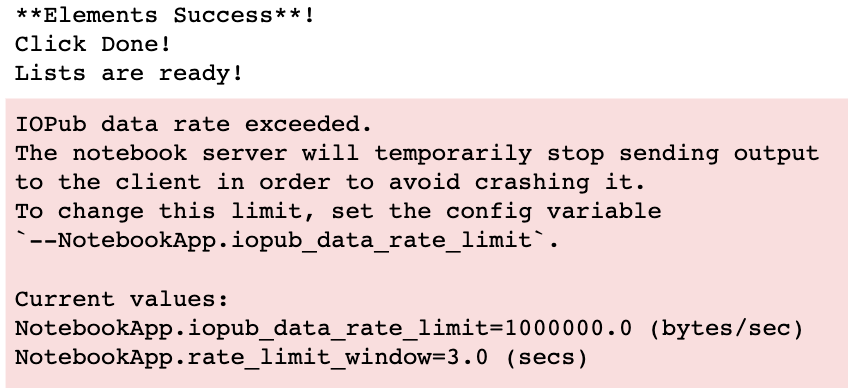
- 해결: https://dev-cini.tistory.com/38

[✅] 리뷰 총 개수랑 list lenght랑 일치하지 않는 이슈
    - driver.find_elements로 클릭하기 전에 time.sleep() 꼭 해줘야 함
[✅] 리뷰 링크 안에서, review_num까지는 잘 찍히는데, list 데이터 3까지만 찍히는 이슈
1. (X) 클릭이 안 되었거나 
    - (확인) 클릭 수 찍어보기 by 함수 3 no.38(print('click!') >> 추가
    - 함수 3 no.23(webdriverwait(3,code))의 시간을 더 늘리기???
2. (X) css select가 제대로 안 되었거나
    - 함수 3 no.78(time.sleep(n)) 추가하기???
3. (O) 다른 css selector를 선택
    - '메뉴 더보기'가 있는 경우, 이 css selector를 먼저 선택하게 됨
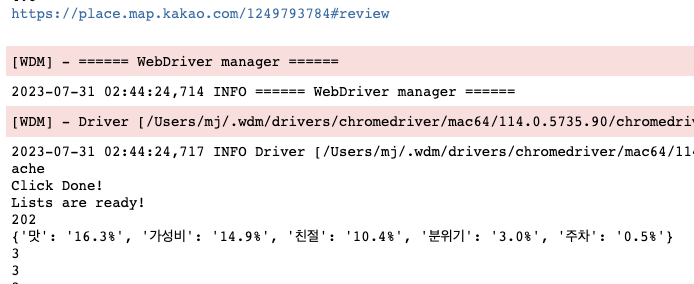

[✅] 2nd case - 크롤링 하다가 disconnnected 되는 이슈
- 첫 에러: ```Message: stale element reference: stale element not found```
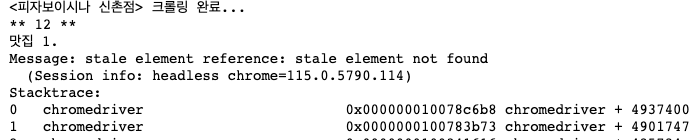
- 그 이후에 맛집 정보랑 리뷰 정보 불일치함 (전자가 잘못됨
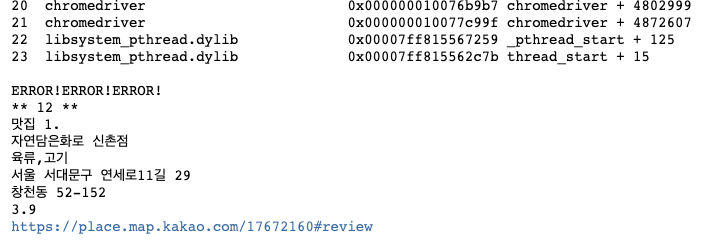
- 둘째 에러: 1와 동일
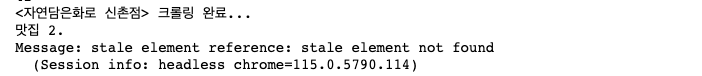
- 마지막 에러: 페이지도 못 찾고 끝
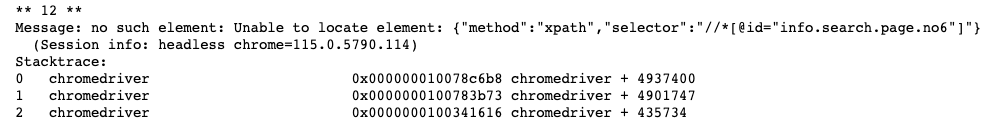

[✅] 1st case - 크롤링 하다가 disconnnected 되는 이슈: ** 10 **의 12. 용용선생 부터 막힘
    1. (X) time.sleep(2) 더 주기
    2. (O) 함수 3 no.23(webdriverwait(3,code)) 더 주기
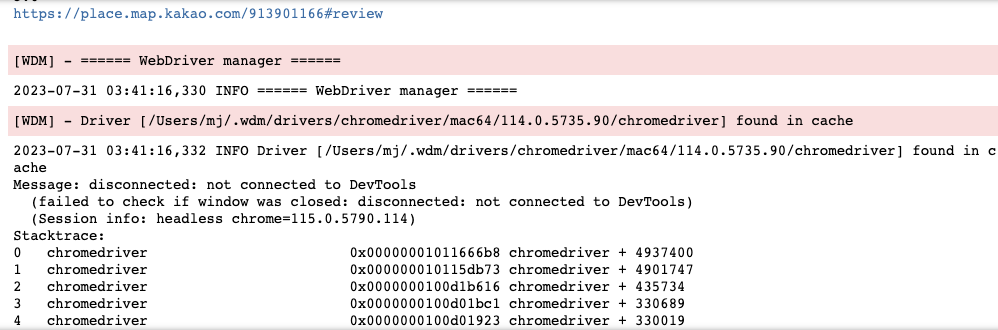
- CSS SELECT 까지는 OK.
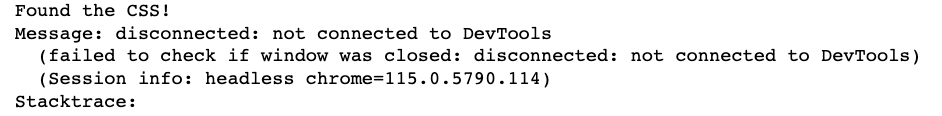
- ```Message: disconnected: not connected to DevTools
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: headless chrome=115.0.5790.114)
Stacktrace:```
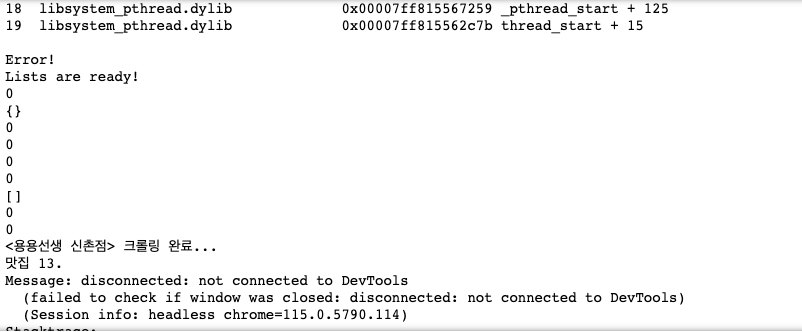